<a href="https://colab.research.google.com/github/rajat1911996sharma/Machine-Learning-Model-Life-Cycle/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K Means Clustering

make clusters
```
Step 1: Choose the number of K clusters

Step 2: Select at random K points, the centroids (not necesarrily in the dataset)

Step 3: Assign ecah data point to the closest centroid -> That foems K clusters

Step 4: compute and place the new centroid of each cluster

Step 5: Reasssign each data point to the new closest centroid. If any reassignment took place, go to step 4,otherwise go to FIN
```



###K Means Random Initialization Trap

A good random inntialization yields great results

A bad random initialization yields results we wont be able to diffrentiate a poor final output from a graeat one

We need to know that there is a true cluster result.

###Choosing the right number of clusters

Within Cluster Sum of squares metric
```
WCSS = summation of clusters in Pi for distance(Pi,Ci)**2

i is the number of cluster
Pi is the datapoint in the cluster i
Ci is the centroid in the cluster i

```

Elbow Method sometimes can be not very clear.




##Data Preprocessing

###Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


###Importing Datasets

In [22]:
df = pd.read_csv('Mall_Customers.csv')

In [23]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
#there is no dependent variable
X = df.iloc[:, [3,4]].values
#so, no y

##Exploratory Data Analysis

In [25]:
d = df.drop('CustomerID',axis=1)

In [26]:
d.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [27]:
d['Male'] = d['Genre'].map({'Male':1,'Female':0})

In [28]:
d.drop('Genre',axis=1,inplace=True)

In [29]:
d

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


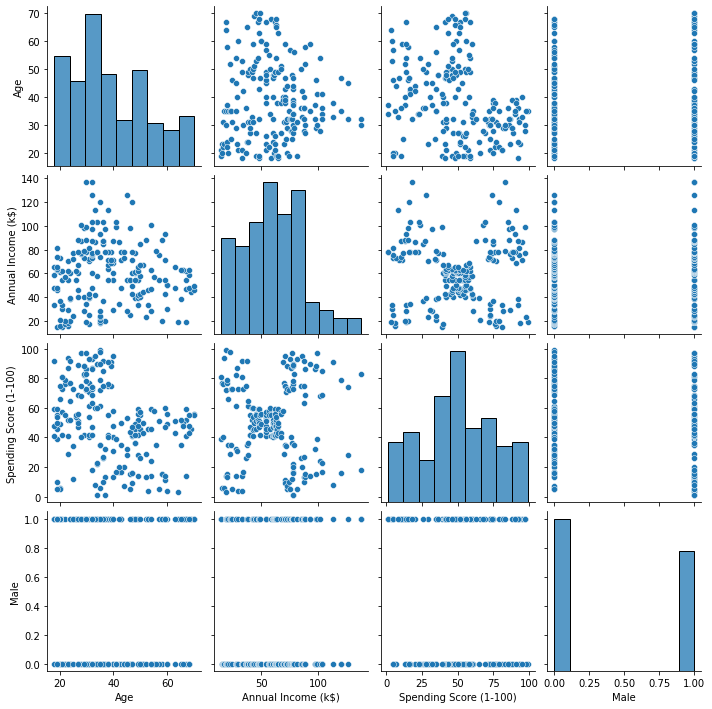

In [30]:
sns.pairplot(d)

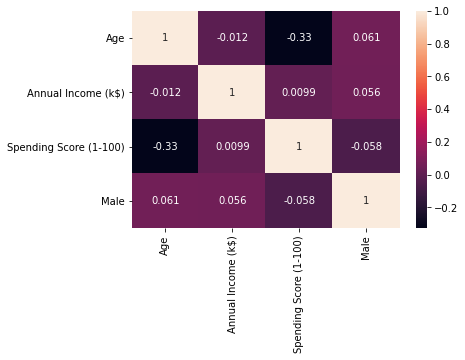

In [31]:
sns.heatmap(d.corr(),annot=True)

In [32]:
d.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Male'], dtype='object')

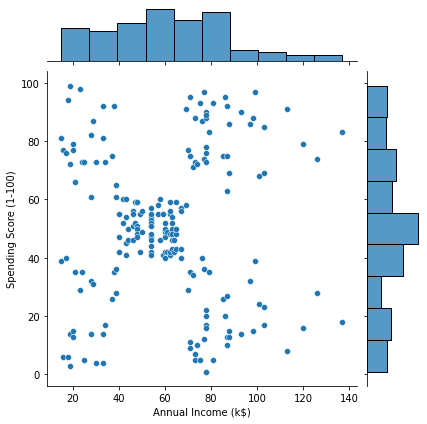

In [33]:
sns.jointplot(x=d['Annual Income (k$)'],y=d['Spending Score (1-100)'])

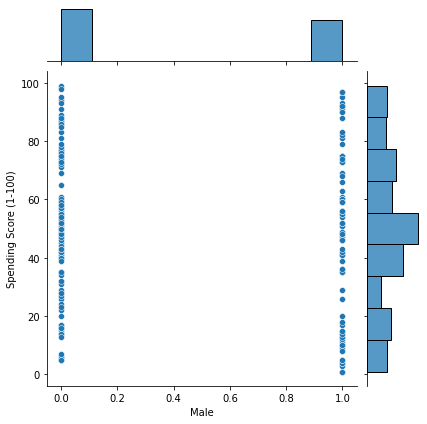

In [34]:
sns.jointplot(x=d['Male'],y=d['Spending Score (1-100)'])

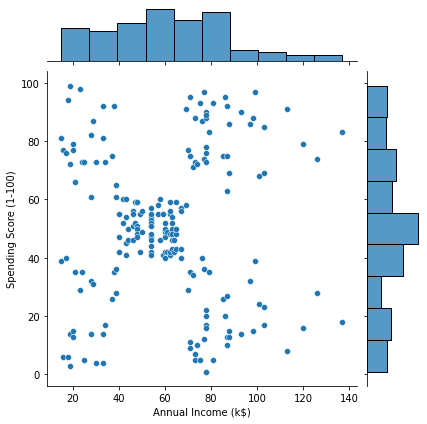

In [35]:
sns.jointplot(x=d['Annual Income (k$)'],y=d['Spending Score (1-100)'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


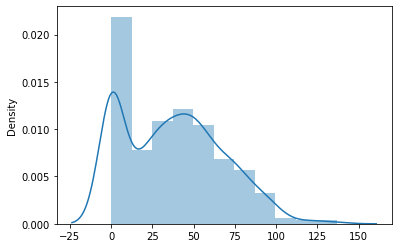

In [36]:
sns.distplot(d)

In [37]:
d['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

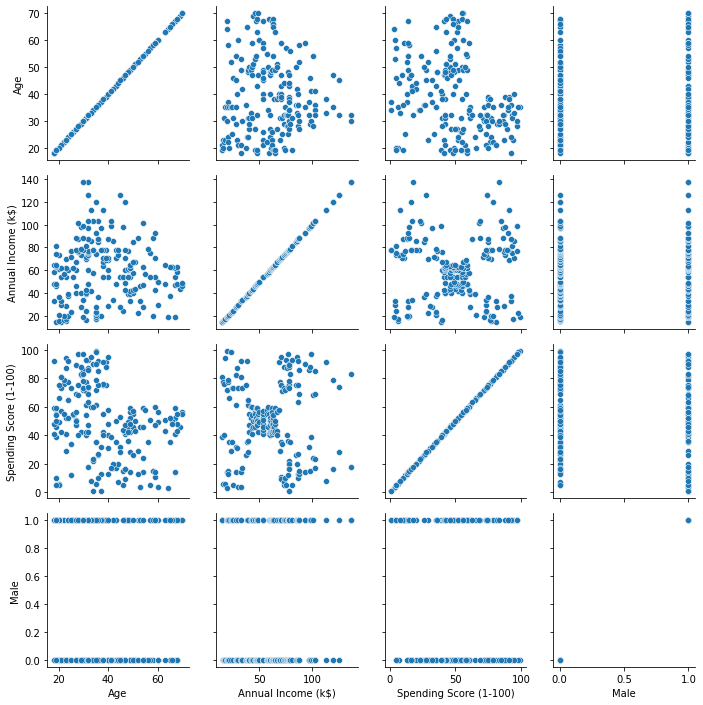

In [38]:
g = sns.PairGrid(d)
g.map(sns.scatterplot)

##Using The Elbow Method to find the optimal number of clusters

[K-Means Read-up](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Text(0, 0.5, 'WCSS')

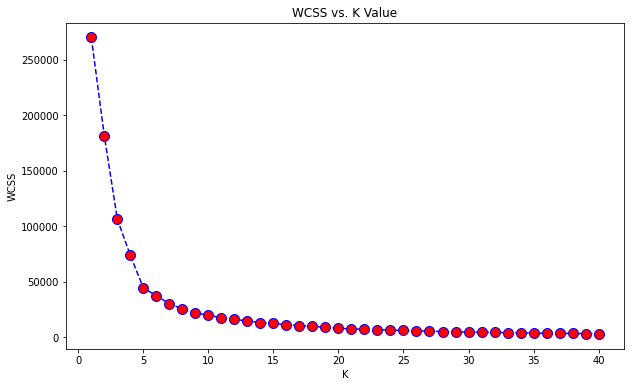

In [52]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,41):
  nn = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  nn.fit(X)
  wcss.append(nn.inertia_)
  #inertia_ is an attribute that gives
  #Sum of squared distances of samples to their closest cluster center

plt.figure(figsize=(10,6))
plt.plot(range(1,41),wcss,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('WCSS vs. K Value')
plt.xlabel('K')
plt.ylabel('WCSS')  

##Training the K-Means model on the dataset

In [53]:
kmeans = KMeans(n_clusters=5, random_state=42)
#kmeans.fit(X)
'''
We are going to identify the dependent variable with the help of
fi_predict() in KMeans
'''
y_kmeans = kmeans.fit_predict(X)

In [54]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

##Visualizing the Clusters

In [55]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

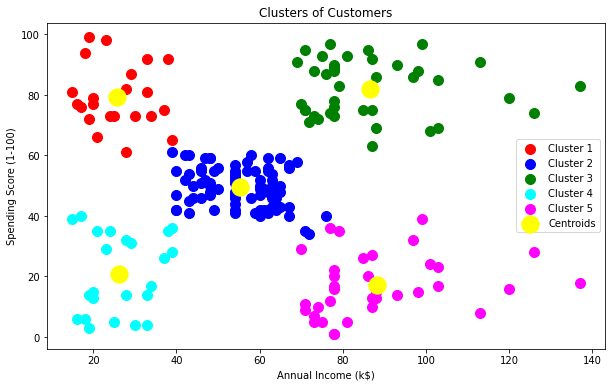

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(x=X[y_kmeans == 0,0],y=X[y_kmeans == 0,1], s=100, c='red',label = 'Cluster 1')
plt.scatter(x=X[y_kmeans == 1,0],y=X[y_kmeans == 1,1], s=100, c='blue',label = 'Cluster 2')
plt.scatter(x=X[y_kmeans == 2,0],y=X[y_kmeans == 2,1], s=100, c='green',label = 'Cluster 3')
plt.scatter(x=X[y_kmeans == 3,0],y=X[y_kmeans == 3,1], s=100, c='cyan',label = 'Cluster 4')
plt.scatter(x=X[y_kmeans == 4,0],y=X[y_kmeans == 4,1], s=100, c='magenta',label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300, c='yellow',label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')  
plt.legend()